In [4]:
%pwd

'c:\\Users\\nandh\\Chatbot-Able\\research'

In [5]:
import os 
os.chdir("../")

In [6]:
%pwd

'c:\\Users\\nandh\\Chatbot-Able'

Load the data 

In [7]:
import json

with open("Data/able_data.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Preview first item
data[0]


{'url': 'https://able.co/work/syntax',
 'text': 'Syntax | Advancing Development with AI Solutions\nThe collective achievements of Syntax and Able stand as a testament to our commitment to providing our partners with a concentrated burst of premium product engineering expertise with the shared goal of accelerating the zero-to-market journey with a fixed amount of pre-seed funding.\n“Able is a go-to-market cheat code for early founder teams. Without them, we couldn’t have moved this fast (and with such high quality).”\n—Will Hudgins, VP of Engineering Syntax'}

In [8]:
print(type(data))
print(data[:2])


<class 'list'>
[{'url': 'https://able.co/work/syntax', 'text': 'Syntax | Advancing Development with AI Solutions\nThe collective achievements of Syntax and Able stand as a testament to our commitment to providing our partners with a concentrated burst of premium product engineering expertise with the shared goal of accelerating the zero-to-market journey with a fixed amount of pre-seed funding.\n“Able is a go-to-market cheat code for early founder teams. Without them, we couldn’t have moved this fast (and with such high quality).”\n—Will Hudgins, VP of Engineering Syntax'}, {'url': 'https://able.co/work/up-together', 'text': 'UpTogether | Optimizing Nonprofit Operations with AI\nThe assessment focused on both backend and frontend solutions, analyzing the breadth of existing Python microservices. Additionally, the AWS architecture, Lambdas, API Gateways, scheduled tasks, event handlers, and RDS instances were evaluated. The assessment relied on:\nInternal Engineering team interviews and

Create LangChain Document objects

In [76]:
from langchain.schema import Document

documents = [
    Document(page_content=entry["text"], metadata={"source": entry["url"]})
    for entry in data
    if "text" in entry and "url" in entry
]

print(f"✅ Loaded {len(documents)} documents")
print(documents[0])  # Preview first one


✅ Loaded 10 documents
page_content='Syntax | Advancing Development with AI Solutions
The collective achievements of Syntax and Able stand as a testament to our commitment to providing our partners with a concentrated burst of premium product engineering expertise with the shared goal of accelerating the zero-to-market journey with a fixed amount of pre-seed funding.
“Able is a go-to-market cheat code for early founder teams. Without them, we couldn’t have moved this fast (and with such high quality).”
—Will Hudgins, VP of Engineering Syntax' metadata={'source': 'https://able.co/work/syntax'}


In [305]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.schema import Document

def split_documents_into_chunks(documents, chunk_size=200, chunk_overlap=100):
    """
    Splits a list of LangChain Document objects into smaller chunks.
    
    Args:
        documents (list): List of langchain.schema.Document objects.
        chunk_size (int): Maximum size of each chunk (in characters).
        chunk_overlap (int): Number of overlapping characters between chunks.
        
    Returns:
        list: List of split Document chunks.
    """
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap
    )
    chunks = text_splitter.split_documents(documents)
    print(f"✅ Split into {len(chunks)} chunks")
    print(chunks[0])  # Preview first chunk
    return chunks


In [306]:

chunks = split_documents_into_chunks(documents)


✅ Split into 148 chunks
page_content='Syntax | Advancing Development with AI Solutions' metadata={'source': 'https://able.co/work/syntax'}


In [272]:
for i, chunk in enumerate(chunks):  # or whatever variable you used
    print(f"Chunk {i+1}: {len(chunk.page_content)} characters")


Chunk 1: 48 characters
Chunk 2: 148 characters
Chunk 3: 146 characters
Chunk 4: 40 characters
Chunk 5: 137 characters
Chunk 6: 39 characters
Chunk 7: 52 characters
Chunk 8: 140 characters
Chunk 9: 147 characters
Chunk 10: 25 characters
Chunk 11: 120 characters
Chunk 12: 122 characters
Chunk 13: 149 characters
Chunk 14: 59 characters
Chunk 15: 51 characters
Chunk 16: 149 characters
Chunk 17: 144 characters
Chunk 18: 72 characters
Chunk 19: 133 characters
Chunk 20: 145 characters
Chunk 21: 84 characters
Chunk 22: 91 characters
Chunk 23: 148 characters
Chunk 24: 71 characters
Chunk 25: 144 characters
Chunk 26: 36 characters
Chunk 27: 29 characters
Chunk 28: 145 characters
Chunk 29: 65 characters
Chunk 30: 138 characters
Chunk 31: 92 characters
Chunk 32: 99 characters
Chunk 33: 129 characters
Chunk 34: 145 characters
Chunk 35: 70 characters
Chunk 36: 99 characters
Chunk 37: 50 characters
Chunk 38: 142 characters
Chunk 39: 33 characters
Chunk 40: 16 characters
Chunk 41: 145 characters
Chunk

In [307]:
%whos


Variable                           Type                     Data/Info
---------------------------------------------------------------------
ChatPromptTemplate                 ModelMetaclass           <class 'langchain_core.pr<...>chat.ChatPromptTemplate'>
Document                           ModelMetaclass           <class 'langchain_core.documents.base.Document'>
HuggingFaceEmbeddings              ModelMetaclass           <class 'langchain_communi<...>e.HuggingFaceEmbeddings'>
OPENAI_API_KEY                     str                      sk-proj-laW5wB5zkcBK_PLhe<...>D6m-hhTV6OfXWbr7wvtM2EmQA
OpenAI                             ModelMetaclass           <class 'langchain_openai.llms.base.OpenAI'>
PINECONE_API_KEY                   str                      pcsk_3CjN9E_DBDJ2X8TgvCay<...>A5ua2iAnzD8vVAKWLorTN8wun
Path                               type                     <class 'pathlib.Path'>
Pinecone                           ABCMeta                  <class 'pinecone.control.pinecone.Pineco

In [308]:
from langchain.embeddings import HuggingFaceEmbeddings
#Download the Embeddings from Hugging Face
def download_hugging_face_embeddings():
    embeddings=HuggingFaceEmbeddings(model_name='sentence-transformers/all-mpnet-base-v2')
    return embeddings


In [309]:
embeddings = download_hugging_face_embeddings()

c:\Users\nandh\anaconda3\envs\Chatbotenv\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\nandh\.cache\huggingface\hub\models--sentence-transformers--all-mpnet-base-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [310]:
query_result = embeddings.embed_query("Hello world")
print("Length", len(query_result))

Length 768


In [311]:
from dotenv import load_dotenv
from pathlib import Path
import os

# .env is in the current directory
env_path = Path(".") / ".env"
loaded = load_dotenv(dotenv_path=env_path)

print("✅ .env loaded:", loaded)


✅ .env loaded: True


In [312]:
PINECONE_API_KEY = os.environ.get('PINECONE_API_KEY')

In [352]:

from pinecone import Pinecone, ServerlessSpec

pc = Pinecone(api_key= PINECONE_API_KEY)
index_name = "ablechatbot"

pc.create_index(
    name=index_name,
    dimension=768, # Replace with your model dimensions
    metric="cosine", # Replace with your model metric
    spec=ServerlessSpec(
        cloud="aws",
        region="us-east-1"
    ) 
)

{
    "name": "ablechatbot",
    "metric": "cosine",
    "host": "ablechatbot-ahm1pur.svc.aped-4627-b74a.pinecone.io",
    "spec": {
        "serverless": {
            "cloud": "aws",
            "region": "us-east-1"
        }
    },
    "status": {
        "ready": true,
        "state": "Ready"
    },
    "vector_type": "dense",
    "dimension": 768,
    "deletion_protection": "disabled",
    "tags": null
}

In [353]:
import os 
os.environ["PINECONE_API_KEY"]=PINECONE_API_KEY


In [354]:
# Embed each chunk and upsert the embeddings into your Pinecone index.
from langchain_pinecone import PineconeVectorStore

docsearch = PineconeVectorStore.from_documents(
    documents=chunks,
    index_name=index_name,
    embedding=embeddings, 
)

In [355]:
# Load Existing index 

from langchain_pinecone import PineconeVectorStore
# Embed each chunk and upsert the embeddings into your Pinecone index.
docsearch = PineconeVectorStore.from_existing_index(
    index_name=index_name,
    embedding=embeddings
)

In [356]:
docsearch


In [357]:
retriever = docsearch.as_retriever(search_type="similarity", search_kwargs={"k":2})

In [358]:
retrieved_docs = retriever.invoke("What is Able?")

In [359]:
retrieved_docs

[Document(id='214ca5c8-0082-4ec4-ac9d-4365bde8e712', metadata={'source': 'https://able.co/work/syntax'}, page_content='“Able is a go-to-market cheat code for early founder teams. Without them, we couldn’t have moved this fast (and with such high quality).”\n—Will Hudgins, VP of Engineering Syntax'),
 Document(id='2769e453-dd5a-4fdf-87d2-836945bd2bd4', metadata={'source': 'https://able.co/team'}, page_content="Able has taught us that regardless of the challenge or complexity, there's nothing we can't achieve together.”")]

In [360]:
OPENAI_API_KEY = os.environ.get('OPENAI_API_KEY')



In [361]:
from dotenv import load_dotenv
from pathlib import Path
import os

# .env is in the current directory
env_path = Path(".") / ".env"
loaded = load_dotenv(dotenv_path=env_path)

print("✅ .env loaded:", loaded)


✅ .env loaded: True


In [362]:
import os 
os.environ["OPENAI_API_KEY"]=OPENAI_API_KEY

In [363]:
from langchain_openai import OpenAI
llm = OpenAI(temperature=0.4, max_tokens=500)

In [364]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate

In [365]:
system_prompt = (
    "You are a helpful AI assistant trained on internal company knowledge from Able.co, "
    "covering its services, projects, team culture, and technology practices. "
    "Answer each question using only the provided context below. "
    "If the answer is not available, say: 'I’m not sure based on the available information.' "
    "Keep your responses concise, clear, and no longer than 3 sentences."
    "\n\nContext:\n{context}"
)


In [366]:
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)

In [367]:
question_answer_chain = create_stuff_documents_chain(llm, prompt)
rag_chain = create_retrieval_chain(retriever, question_answer_chain)

In [386]:
response = rag_chain.invoke({"input": "What did Able build for Syntax??"})
print(response["answer"])


Able provided Syntax with a concentrated burst of premium product engineering expertise, allowing them to move quickly and with high quality.


In [385]:
response = rag_chain.invoke({"input": "How does Able ensure secure AI development?"})
print(response["answer"])



Able prioritizes secure AI development by embedding emerging best practices and state-of-the-art techniques throughout their ideation and development processes. This ensures that their AI solutions are secure, transparent, and governed.


In [370]:
response = rag_chain.invoke({"input": "what is Able’s Unique Capability ?"})
print(response["answer"])



Able's unique capability is its ability to constantly evolve and deliver cutting-edge solutions for clients, with a focus on innovation in software development, particularly in utilizing AI to improve processes and talent density.


In [371]:
response = rag_chain.invoke({"input": "howw many partnerrs in able ?"})
print(response["answer"])




There is no specific number of partners mentioned in the given context. However, it can be inferred that Able has multiple partners based on their success in helping 2176 students raise $4,158,601 in funding for summer.


In [372]:
test_questions = [
    {"question": "What did Able build for Syntax?", "expected": "Syntax and Able accelerated the zero-to-market journey using AI."},
    {"question": "What is Able’s approach to security?", "expected": "They prioritize secure, transparent, and governed AI development."},
]

for i, test in enumerate(test_questions):
    response = rag_chain.invoke({"input": test["question"]})
    print(f"Q{i+1}: {test['question']}")
    print(f"Expected: {test['expected']}")
    print(f"Actual: {response['answer']}")
    print("-" * 50)


Q1: What did Able build for Syntax?
Expected: Syntax and Able accelerated the zero-to-market journey using AI.
Actual: 

Able provided Syntax with a concentrated burst of premium product engineering expertise.
--------------------------------------------------
Q2: What is Able’s approach to security?
Expected: They prioritize secure, transparent, and governed AI development.
Actual: 

Able prioritizes security in its services and technology practices to ensure efficient and safe product delivery for its clients.
--------------------------------------------------


In [373]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("all-MiniLM-L6-v2")  # same as you use

def similarity_score(answer, expected):
    embeddings = model.encode([answer, expected], convert_to_tensor=True)
    score = util.pytorch_cos_sim(embeddings[0], embeddings[1])
    return score.item()

for test in test_questions:
    response = rag_chain.invoke({"input": test["question"]})
    score = similarity_score(response["answer"], test["expected"])
    print(f"Q: {test['question']}\nScore: {score:.3f}")


Q: What did Able build for Syntax?
Score: 0.487
Q: What is Able’s approach to security?
Score: 0.533


In [374]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("all-MiniLM-L6-v2")  # same as you use

def similarity_score(answer, expected):
    embeddings = model.encode([answer, expected], convert_to_tensor=True)
    score = util.pytorch_cos_sim(embeddings[0], embeddings[1])
    return score.item()

for test in test_questions:
    response = rag_chain.invoke({"input": test["question"]})
    score = similarity_score(response["answer"], test["expected"])
    print(f"Q: {test['question']}\nScore: {score:.3f}")


Q: What did Able build for Syntax?
Score: 0.487
Q: What is Able’s approach to security?
Score: 0.412


100%|██████████| 96/96 [01:45<00:00,  1.10s/it]


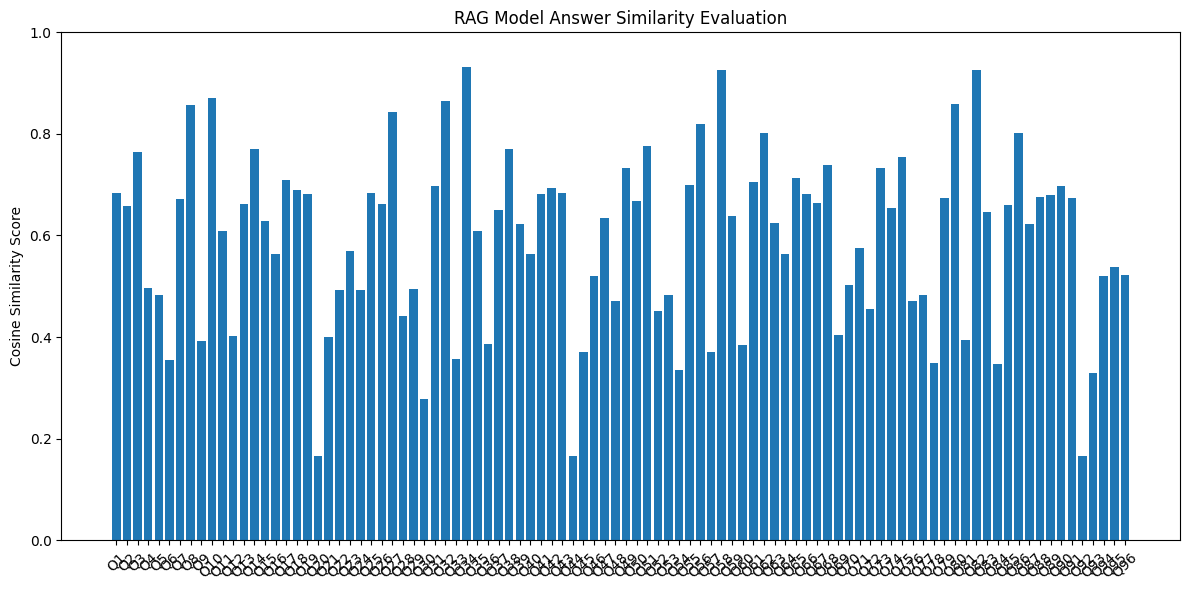

In [378]:
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm

# Load evaluation data
df = pd.read_csv("Data/able_qa_dataset_100.csv")

# Load similarity model (same as used in embedding)
similarity_model = SentenceTransformer("sentence-transformers/all-mpnet-base-v2")

# Store results
results = []

for _, row in tqdm(df.iterrows(), total=len(df)):
    question = row["question"]
    ground_truth = row["answer"]

    try:
        response = rag_chain.invoke({"input": question})
        model_answer = response["answer"]
    except Exception as e:
        model_answer = "Error"

    # Compute similarity score
    emb1 = similarity_model.encode(model_answer, convert_to_tensor=True)
    emb2 = similarity_model.encode(ground_truth, convert_to_tensor=True)
    score = util.cos_sim(emb1, emb2).item()

    results.append({
        "question": question,
        "ground_truth": ground_truth,
        "model_answer": model_answer,
        "similarity_score": round(score, 3)
    })

# Save results
results_df = pd.DataFrame(results)
results_df.to_csv("evaluation_results.csv", index=False)

# Plot the scores
plt.figure(figsize=(12, 6))
plt.bar(range(len(results_df)), results_df["similarity_score"])
plt.xticks(range(len(results_df)), [f"Q{i+1}" for i in range(len(results_df))], rotation=45)
plt.ylabel("Cosine Similarity Score")
plt.ylim(0, 1)
plt.title("RAG Model Answer Similarity Evaluation")
plt.tight_layout()
plt.show()


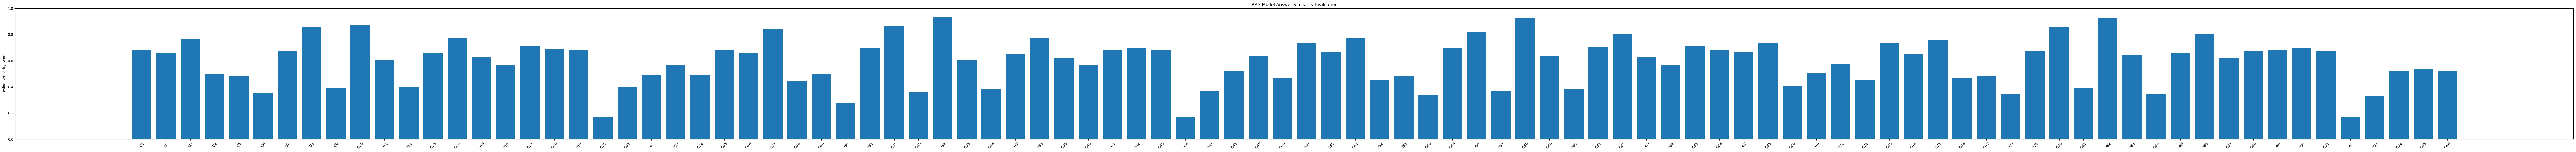

In [383]:
# Plot the scores
plt.figure(figsize=(100, 6))
plt.bar(range(len(results_df)), results_df["similarity_score"])
plt.xticks(range(len(results_df)), [f"Q{i+1}" for i in range(len(results_df))], rotation=45)
plt.ylabel("Cosine Similarity Score")
plt.ylim(0, 1)
plt.title("RAG Model Answer Similarity Evaluation")
plt.tight_layout()
plt.show()